<div> 
<h1>Visualizacion con Python</h1>
</div>

<p>   
En este cuaderno se abordan algunos ejemplos concretos acerca de como generar imagenes que nos permitan visualizar formas de onda (señales de audio), espectrogramas (representacion temporal y en frecuencia), y cromagramas (representacion tiempo-chroma).
</p>

## Paquetes Python

Introducimos alternativas basadas en la libreria Python para producir graficos 2D <a href="https://matplotlib.org">Matplotlib</a> y el paquete Python <a href="https://librosa.org/doc/latest/index.html">LibROSA</a> diseñado especificamente para el analisis musical. Ademas de brindar herramientas requeridas para la creacion de sistemas de recuperacion de informacion musical [MIR](https://www.ismir.net/), LibROSA dispone de funciones de visualizacion contenidas en [`librosa.display`](https://librosa.org/doc/latest/display.html?highlight=display#module-librosa.display) las cuales, a su vez, se construyen en base a la libreria `matplotlib`.

## Ejemplos Basicos

En primer lugar, importamos varios paquetes Python requeridos en este cuaderno. El comando `%matplotlib inline` garantiza que las figuras se exhiban dentro del cuaderno Jupyter. 

In [13]:
import os
import numpy as np
from matplotlib import pyplot as plt
import librosa
import librosa.display


El siguiente ejemplo genera una funcion seno y coseno. La misma se exporta en formato `PNG`.

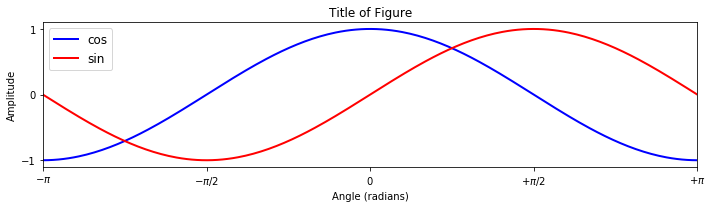

In [14]:
plt.figure(figsize=(10,3))
plt.title('Title of Figure',fontsize=12)
X = np.linspace(-np.pi,np.pi,256,endpoint=True)
C,S = np.cos(X),np.sin(X)
plt.plot(X,C,color='blue',linewidth=2.0,linestyle='-',label='cos')
plt.plot(X,S,color='red',linewidth=2.0,linestyle='-',label='sin')
plt.legend(loc='upper left',fontsize=12)
plt.xlim(-np.pi,np.pi)
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],
           [r'$-\pi$',r'$-\pi/2$',r'$0$',r'$+\pi/2$',r'$+\pi$'],fontsize=10)
plt.ylim(C.min()*1.1,C.max()*1.1)
plt.yticks([-1,0,1],fontsize=10)
plt.xlabel('Angle (radians)')
plt.ylabel('Amplitude')
plt.tight_layout()

# This requires that the output folder exists
output_path_filename = os.path.join('..','output','B','FMP_B_Figure_CosSin.png')
plt.savefig(output_path_filename)

El siguiente ejemplo muestra como generar graficos empleando [`subplot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) y [`axes`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axes.html) asi como diversas caracteristicas de `matplotlib`.

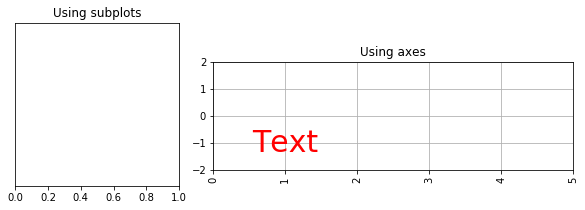

In [15]:
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.yticks(())
plt.title('Using subplots',fontsize=12)

plt.axes([0.4,0.2,0.5,0.5]) # [left,bottom,width,height]
plt.title('Using axes',fontsize=12)
plt.xlim(0,5)
plt.ylim(-2,2)
plt.grid()
ax = plt.gca()
plt.setp(ax.get_xticklabels(),rotation='vertical',fontsize=10)
plt.text(1,-1,'Text',ha='center',va='center',size=30,color='red')

output_path_filename = os.path.join('..','output','B','FMP_B_Figure_Subplots.png')
plt.savefig(output_path_filename)

A continuacion, ilustramos como visualizar el grafico de una funcion generada por Python. En el siguiente ejemplo, empleamos la notacion y conceptos introducidos en el Capitulo 2 de <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>. 

* En primer lugar, generamos una señal en tiempo discreto $x$ usando una frecuencia de muestreo $F_\mathrm{s}=256$. 
* Esta señal se convierte en una DFT (transformada de Fourier discreta) $X$ aplicando una FFT. 
* La secuencia compleja $X$ resultado de la DFT se modifica fijando valores nulos para aquellas magnitudes por debajo de un determinado limite $\tau$. Esta operacion resulta en $X_\mathrm{mod}$.
* Finalmente, se aplica la inversa DFT para reconstruir una señal temporal. Definimos la parte real de esta señal como $x_\mathrm{mod}$.

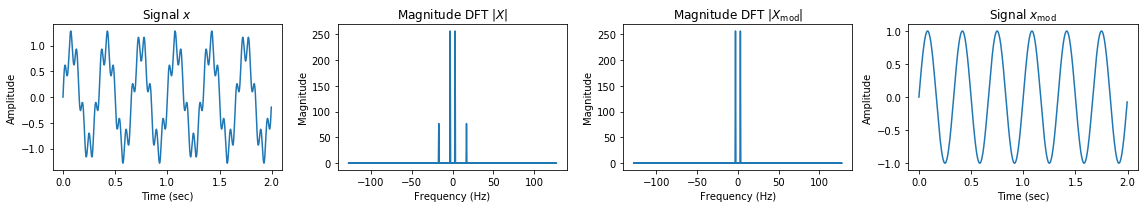

In [16]:
import numpy as np

Fs,t_start,t_end = 256,0,2
t = np.arange(t_start,t_end,1/Fs)
x = np.sin(2*np.pi*3*t) + 0.3*np.sin(2*np.pi*17*t)
plt.figure(figsize=(16,3))
plt.subplot(1,4,1)
plt.plot(t,x) 
plt.title('Signal $x$')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')

X = np.fft.fft(x)
N = x.size # window length (number of samples)
d = 1/Fs # sample spacing (sampling period)
freq = np.fft.fftfreq(N,d) # DFT sample frequencies
plt.subplot(1,4,2)
plt.plot(freq,np.abs(X))
plt.title('Magnitude DFT $|X|$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude') 

tau = 100
X_mod = X.copy()
X_mod[np.abs(X) < tau] = 0
plt.subplot(1,4,3)
plt.plot(freq,np.abs(X_mod))
plt.title('Magnitude DFT $|X_\mathrm{mod}|$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

x_mod = np.real(np.fft.ifft(X_mod))
plt.subplot(1,4,4)
plt.plot(t,x_mod)
plt.title('Signal $x_\mathrm{mod}$')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.tight_layout()

output_path_filename = os.path.join('..','output','B','FMP_B_Figure_DFT.png')
plt.savefig(output_path_filename)

## Graficando una Forma de Onda

Como ejemplo ilustrativo, empleamos un registro de audio correspondiente a una escala de C mayor tocada en un piano. Para una introduccion a representaciones de audio y formas de onda, referimos a la Seccion 1.3 de <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015].</a>

<img src="../data/B/FMP_B_Scale-Cmajor.png" width="300px" alt="escala de C mayor" align="left">

<br clear="all" />

<audio src="../data/B/FMP_B_Scale-Cmajor_Piano.wav" type="audio/mpeg" controls="controls"></audio>
   
En primer lugar, cargamos el archivo de audio convirtiendo la frecuencia de muestreo a `Fs=11025` Hertz.

In [17]:
Fs = 11025
x,Fs = librosa.load(os.path.join('..','data','B','FMP_B_Scale-Cmajor_Piano.wav'),sr=Fs)
print('La señal x tiene %d muestras y una duracion de %.2f segundos.' % (len(x),len(x)/Fs))

La señal x tiene 120400 muestras y una duracion de 10.92 segundos.


A continuacion, graficamos la forma de onda de la señal. La señal x consiste en una secuencia ordenada de numeros reales que representan los valores de amplitud muestreados. El siguiente codigo muestra como graficar la señal empleando la funcion [`plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) de Matplotlib.

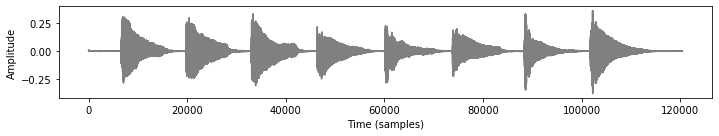

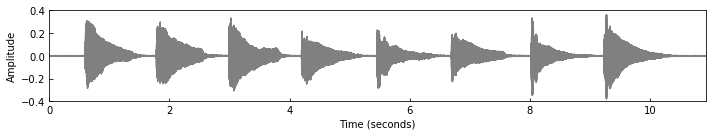

In [18]:
plt.figure(figsize=(10,2))
plt.plot(x,color='gray')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()

# Define time axis in seconds
n = np.arange(x.shape[0]) # vector of indices
t = n/Fs
plt.figure(figsize=(10,2))
plt.plot(t,x,color='gray')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim([t[0],t[-1]])
plt.ylim([-0.40,0.40])
plt.tick_params(direction='in')
plt.tight_layout()

Como alternativa, podemos emplear la funcion `librosa.display.waveplot`. En lugar de graficar los valores de las muestras, esta funcion exhibe la **envolvente de amplitud de la forma de onda**, resultando un grafico simetrico con respecto al eje horizontal.

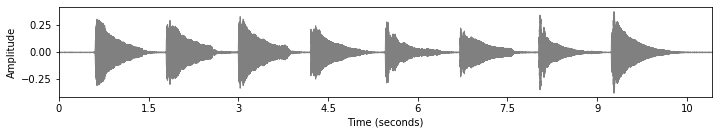

In [19]:
plt.figure(figsize=(10,2))
librosa.display.waveplot(x,sr=Fs,color='gray')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()

## Graficando un Espectrograma

A continuacion, consideramos el caso de graficos 2D empleando una representacion en espectrograma a modo de ejemplo.
El espectrograma es una representacion de una señal donde se muestra la variacion en energia (o mejor dicho el poder de densidad espectral) en los dominios de frecuencia y tiempo. Los valores del espectrograma se obtienen calculando una transformada de Fourier de tiempo corto (STFT) de la señal y considerando la magnitud resultante para cada coordenada de indices *(m, k)=(fotograma, frecuencia)*. Por detalles, referimos a la Seccion 2.1.4 de <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>.

En el siguiente ejemplo de codigo, calculamos una STFT empleando el paquete `librosa` adoptando un tamaño de ventana $N$ y un tamaño de salto $H$. El uso de la funcion `librosa.display.specshow` nos permite visualizar el espectrograma $Y$, donde los valores de magnitud se convierten a la escala decibel, mientras que ambos ejes *(tiempo, frecuencia)* se expresan en unidades fisicas *(segundos, Hertz)*.

Tamaño del Espectrograma: (1025, 118)
Numero de fotogramas: 118.0


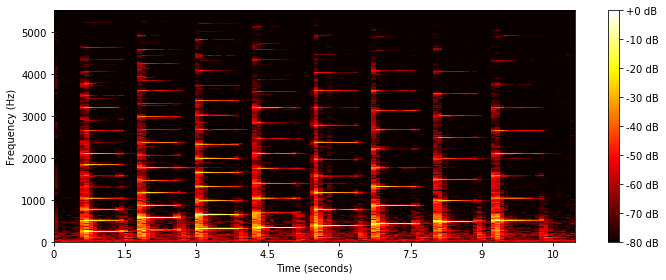

In [20]:
N,H = 2048,1024

X = librosa.stft(x,n_fft=N,hop_length=H,win_length=N,window='hanning')
Y = np.abs(X)
print('Tamaño del Espectrograma:',Y.shape)

# ********** NOTA 1 **********
# n_fft: length of the windowed signal after padding with zeros. The number of rows in the 
# STFT matrix Y is (1 + n_fft/2). 
# ****************************

# ********** NOTA 2 **********
# Ns: number of samples
# Nf: number of frames
# res_F: frequency resolution
# res_T: time resolution

# t=n*T --> delta_t=Ns*T=Ns/Fs
# res_F=k/F_coef=N/Fs [coefficients/Hz]
# res_T=m/T_coef=Fs/H [frames/s]

Ns = len(x) 
Nf = np.rint(Ns/H)
print('Numero de fotogramas:',Nf)
# ****************************

plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.amplitude_to_db(Y,ref=np.max), 
                         y_axis='linear',x_axis='time',sr=Fs,hop_length=H,cmap='hot')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()

A menudo no resulta trivial relacionar propiedades fisicas (por ejemplo, tiempo en *segundos*) con una version discreta (por ejemplo, tiempo en *fotogramas*). Una razon para esto consiste en que un determinado indice de fotograma se corresponde con un intervalo temporal (cubierto por la funcion ventana) en lugar de un tiempo puntual.
Frecuentemente adoptamos un vista <font color="red">**centered**</font>, en la cual el centro del primer fotograma se corresponde con el tiempo puntual $0$ (dado en segundos). En consecuencia, al calcular un fotograma STFT requerimos aplicar tecnicas de relleno (*padding*) adecuadas (prolongando la señal desde la mitad de longitud de ventana hacia la izquierda).

Conociendo la frecuencia de muestreo `Fs`, el tamaño de ventana `N` y el tamaño de salto `H`, es posible determinar para cada valor de magnitud espectral `Y[k,m]` la posicion fisica temporal (en segundos) correspondiente al indice de fotograma `m` y el valor fisico de frecuencia (en Hertz) asociado al indice de coeficiente `k`. 
El siguiente codigo ilustra el proceso de calculo haciendo uso de funciones disponibles en `librosa`:

In [21]:
Ns = x.shape[0] # number of samples
Nf = X.shape[1] # number of frames
Nc = N/2+1 # number of coefficients (bins) 

t_samples = np.arange(Ns)/Fs # vector of samples [s] 
t_frames = np.arange(Nf)*H/Fs # vector of frames [s]
f_hertz = np.arange(Nc)*Fs/N # vector of bins [Hz] (Works only when N is even)

print('Time (seconds) of last sample:',t_samples[-1])
print('Time (seconds) of last frame: ',t_frames[-1])
print('Frequency (Hz) of last bin:   ',f_hertz[-1])

t_samples_librosa = librosa.samples_to_time(np.arange(Ns),sr=Fs)
t_frames_librosa = librosa.frames_to_time(np.arange(Nf),sr=Fs,hop_length=H)
f_hertz_librosa = librosa.fft_frequencies(Fs,N)

# Test whether all array elements are equal
assert np.all(t_samples == t_samples_librosa)
assert np.all(t_frames == t_frames_librosa)
assert np.all(f_hertz == f_hertz_librosa)

Time (seconds) of last sample: 10.920544217687075
Time (seconds) of last frame:  10.866938775510205
Frequency (Hz) of last bin:    5512.5


En general, empleamos la funcion `matplotlib.pyplot.imshow` para graficar matrices 2D de valores reales como una imagen. El siguiente codigo grafica la matriz $Y$.

El espectrograma Y tiene 1025 coeficientes (bins) y 118 fotogramas (frames).


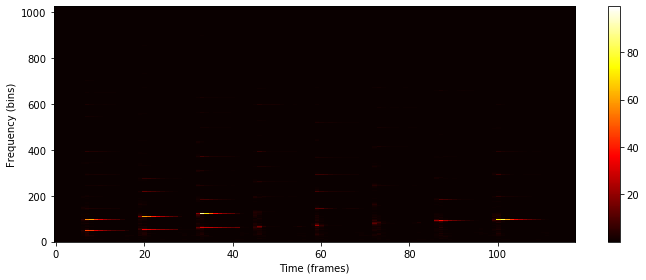

In [22]:
print('El espectrograma Y tiene %d coeficientes (bins) y %d fotogramas (frames).' 
      % (Y.shape[0],Y.shape[1]))
plt.figure(figsize=(10,4))
plt.imshow(Y,cmap='hot',aspect='auto',origin='lower')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency (bins)')
plt.colorbar()
plt.tight_layout()

Con el proposito de disponer ejes con significado fisico, es posible emplear el argumento `extent` a fin de especificar las coordenadas de datos `[left, right, lower, upper]`, donde `left` y `right` corresponden al rango del eje horizontal, mientras que `lower` y `upper` corresponden al rango del eje vertical.
En el siguiente ejemplo, se asigna a `left` el valor negativo equivalente a la mitad de longitud de un fotograma (dado en segundos, correspondiente al tiempo fisico del primer fotograma), a `lower` el valor negativo equivalente a la mitad de longitud de un coeficiente (dado en Hertz), y asi sucesivamente. 

En forma adicional, hemos aplicado compresion logaritmica a los valores de magnitud STFT. Este paso se efectua como alternativa al empleo de la escala decibel, ver la Seccion 3.1.2.1 de <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a> por detalles.

Time range (seconds): [-0.09,11.05]; frequency range (Hertz): [-2.69,5520.57]


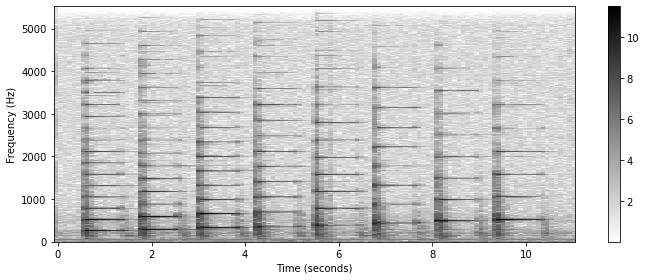

In [23]:
left = - (N/Fs)/2
right = Nf*H/Fs + (N/Fs)/2
lower = - (Fs/N)/2
upper = Nc*Fs/N + (Fs/N)/2

print('Time range (seconds): [%5.2f,%5.2f]; frequency range (Hertz): [%5.2f,%5.2f]' 
      % (left,right,lower,upper))
      
plt.figure(figsize=(10,4))
plt.imshow(np.log(1+1000*Y),cmap='gray_r',aspect='auto',origin='lower',extent=[left,right,lower,upper])
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.tight_layout()

Otra alternativa para graficar matrices 2D consiste en recurrir a la funcion `matplotlib.pyplot.pcolormesh`. La misma recibe un vector `h` de coordenadas horizontales, un vector `v` de coordenadas verticales, y una matriz `I` con los valores para la imagen. El valor asociado a `I(k,m)` se representa en un recinto cuadrado de esquina izquierda-inferior `[h[m],v[k]]` y esquina derecha-superior `[h[m+1],v[k+1]]`. Por consiguiente, las dimensiones de `h` y `v` deberian superar en una unidad a aquellas de `I`. 

Dimensiones de I, h, v: (1025, 118) (119,) (1026,)


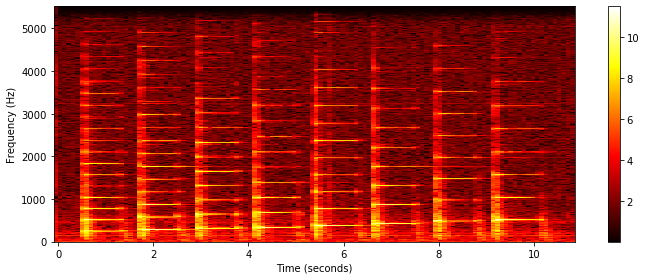

In [24]:
h = np.concatenate([t_frames,[t_frames[-1]+H/Fs]]) + left 
v = np.concatenate([f_hertz,[f_hertz[-1]+Fs/N]]) + lower
I = np.log(1+1000*Y)

plt.figure(figsize=(10,4))
#plt.pcolormesh(h,v,I,cmap='gray_r')
plt.pcolormesh(h,v,I,cmap='hot')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.tight_layout()

print('Dimensiones de I, h, v:',I.shape,h.shape,v.shape)

## Graficando un Cromagrama

A modo de ejemplo, consideramos caracteristicas musicales basadas en la secuencia *croma* de una señal de audio. Asumiendo una *escala temperada* (sistema musical en el cual la distancia entre una nota y la siguiente mas proxima es siempre de un semitono) se tiene en cuenta el conjunto

$$
\{\mathrm{C}, \mathrm{C}^\mathrm{\sharp}, \mathrm{D}, \mathrm{D}^\mathrm{\sharp}, \mathrm{E} ,\mathrm{F}, \mathrm{F}^\mathrm{\sharp}, \mathrm{G}, \mathrm{G}^\mathrm{\sharp}, \mathrm{A}, \mathrm{A}^\mathrm{\sharp}, \mathrm{B}\} 
$$

el cual consiste en los doce atributos croma tal como se emplean en la notacion musical occidental. La idea principal de las caracteristicas croma reside en asignar para una determinada ventana de tiempo local toda la informacion que se relaciona a un croma dado en un unico coeficiente.
Desplazando la ventana de tiempo a traves de la representacion musical, resulta una secuencia de caracteristicas croma la cual expresa de que forma el conjunto de notas contenida en la ventana de tiempo se distribuye sobre las doce bandas croma. La representacion tiempo-croma a la cual se refiere como **cromagrama**, puede calcularse a partir de un espectrograma agrupando adecuadamente los coeficientes de frecuencia. Por detalles, nos referimos a la Seccion 3.1.2 de <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>.

A continuacion, empleamos `librosa` para calcular un cromagrama a partir de un espectrograma y posteriormente visualizamos empleando la funcion `librosa.display.specshow`.

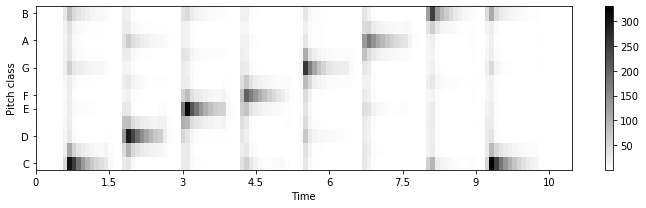

In [25]:
C = librosa.feature.chroma_stft(S=Y,norm=None)

plt.figure(figsize=(10,3))
librosa.display.specshow(C,y_axis='chroma',x_axis='time',sr=Fs,hop_length=H,cmap='gray_r')
plt.colorbar()
plt.tight_layout()

En forma alternativa, es posible visualizar el cromagrama empleando la funcion `matplotlib.pyplot.imshow`. 

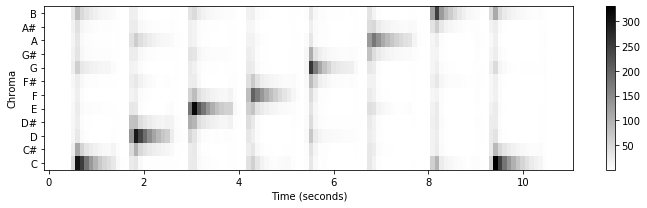

In [26]:
bottom = - 0.5
top = 11.5

plt.figure(figsize=(10, 3))
plt.imshow(C,cmap='gray_r',aspect='auto',origin='lower',extent=[left,right,bottom,top])
plt.xlabel('Time (seconds)')
plt.ylabel('Chroma')
plt.yticks(np.arange(12),'C C# D D# E F F# G G# A A# B'.split())
plt.colorbar()
plt.tight_layout()

A continuacion, modificamos la apariencia de la figura ajustando algunos parametros. Existen varias maneras de establecer las propiedades de los ejes, como podemos comprobar en [`matplotlib.axes.Axes.axis`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axis.html).

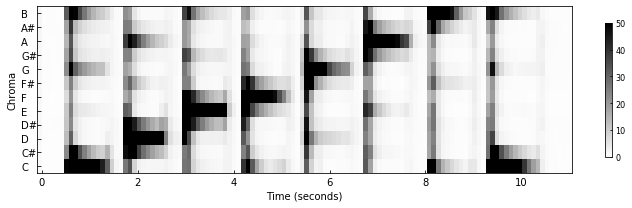

In [27]:
plt.figure(figsize=(10,3))
plt.imshow(C,cmap='gray_r',aspect='auto',origin='lower',
           extent=[left,right,bottom,top])
plt.xlabel('Time (seconds)')
plt.ylabel('Chroma')

# align the chroma tick labels to the left
plt.yticks(np.arange(12),'C C# D D# E F F# G G# A A# B'.split(),ha='left')

# avoid overlapping of ticks and axes
yax = plt.gca().get_yaxis() 
yax.set_tick_params(pad=16)
plt.tick_params(direction='in')

# set the color limits of the current image
plt.clim((0,50))

# modify the appearance of the colorbar
cbar = plt.colorbar(shrink=0.8)
cbar.ax.tick_params(labelsize=8) 
cbar.ax.tick_params(direction='in')
cbar.ax.tick_params(length=2)

# adjust subplot parameters so that the subplots fit into the figure area
plt.tight_layout()

En forma analoga al caso del espectrograma, es factible usar `matplotlib.pyplot.pcolormesh` para obtener una visualizacion similar:

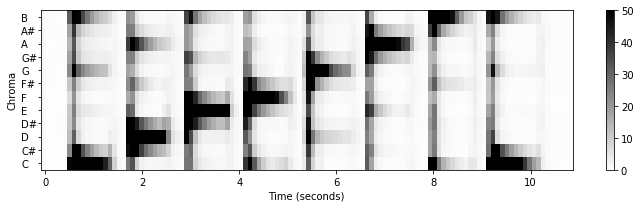

In [28]:
v = np.arange(13) - 0.5

plt.figure(figsize=(10,3))
plt.pcolormesh(h,v,C,cmap='gray_r')
plt.xlabel('Time (seconds)')
plt.ylabel('Chroma')
plt.yticks(np.arange(12),'C C# D D# E F F# G G# A A# B'.split(),ha='left')
plt.clim((0,50))
plt.colorbar()

# ha='left' leads to overlapping of ticks and plot. so we need some padding.
yax = plt.gca().get_yaxis()  
yax.set_tick_params(pad=16)
plt.tight_layout()

## Controlando la barra de color

Por defecto, imshow muestra los datos de una matriz como pixeles los cuales visualiza en forma de cuadrado (`aspect='equal'`). En consecuencia, la proporcion global (aspecto) de un grafico se corresponde con la dimension de la matriz. Por otra parte, el parametro ``aspect='auto'`` ajusta los aspectos de modo tal que los datos se adapten a los ejes, dando como resultado pixeles no cuadrados.

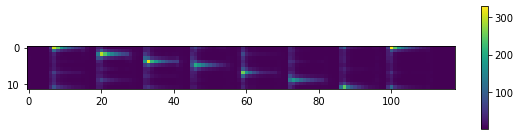

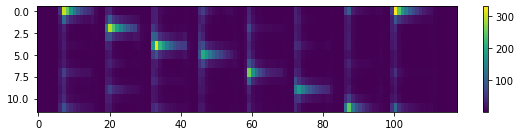

In [29]:
plt.figure(figsize=(8,2))
plt.imshow(C)
plt.colorbar()
plt.tight_layout()

plt.figure(figsize=(8, 2))
plt.imshow(C, aspect='auto')
plt.colorbar()
plt.tight_layout()

A fin de controlar el ancho de la barra de color podemos recurrir al modulo `gridspec`, el cual posibilita especificar la ubicacion de sub-graficos en la figura. Por detalles, referimos a [Customizing Location of Subplot Using GridSpec](https://matplotlib.org/users/gridspec.html).

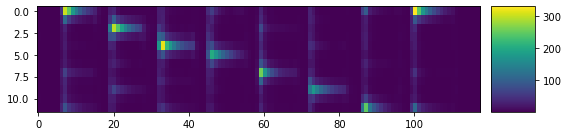

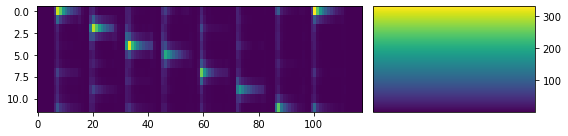

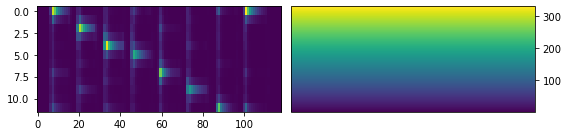

In [30]:
import matplotlib.gridspec as gridspec

for cwidth in [0.1,0.5,1]:
    
    plt.figure(figsize=(8,2))
    gs = gridspec.GridSpec(1,2,width_ratios=[1,cwidth])

    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])

    im = ax0.imshow(C,aspect='auto')
    plt.colorbar(im, cax=ax1)
    plt.tight_layout()

El modulo `gridspec` permite asimismo alinear graficos que disponen o no de su barra de color.

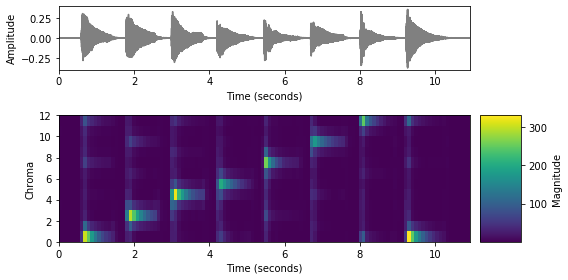

In [31]:
plt.figure(figsize=(8,4))
gs = gridspec.GridSpec(2,2,width_ratios=[1,0.1], height_ratios=[1,2])

ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[0,1])
ax2 = plt.subplot(gs[1,0])
ax3 = plt.subplot(gs[1,1])
    
im = ax0.plot(t,x,color='gray')
ax0.set_xlabel('Time (seconds)')
ax0.set_ylabel('Amplitude')
ax0.set_xlim([t[0],t[-1]])
ax0.set_ylim([-0.40,0.40])
ax1.set_axis_off()

im = ax2.imshow(C,aspect='auto',origin='lower',extent=[t[0],t[-1],0,12])
plt.colorbar(im,cax=ax3)
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Chroma')
ax3.set_ylabel('Magnitude')

plt.tight_layout()

In [32]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())